<a href="https://colab.research.google.com/github/sakshiharde/Sms_Spam_Classifier/blob/main/Spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
sms_data=pd.read_csv('/content/drive/MyDrive/content/spam.csv',encoding='latin-1')

In [11]:
sms_data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4969,ham,We are supposed to meet to discuss abt our tri...,NaN,NaN,NaN
4145,ham,I canåÕt wait for cornwall. Hope tonight isnåÕ...,NaN,NaN,NaN
4402,ham,Just getting back home,NaN,NaN,NaN
2939,spam,You have 1 new message. Please call 08712400200.,NaN,NaN,NaN
3491,ham,I will reach office around &lt;DECIMAL&gt; . ...,NaN,NaN,NaN


In [12]:
sms_data.shape

(5572, 5)

In [13]:
# 1.Data Cleaning
# 2.EDA
# 3.Text Preprocessing
# 4.Model building
# 5.Evaluation
# 6.Improvement
# 7.Website
# 8.Deploy

# 1.Data Cleaning

In [14]:
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
#drop last 3 cols
sms_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [16]:
sms_data.sample(5)

,v1,v2
2611,spam,Knock Knock Txt whose there to 80082 to enter ...
1013,ham,Just buy a pizza. Meat lovers or supreme. U ge...
4017,ham,"\GRAN ONLYFOUND OUT AFEW DAYS AGO.CUSOON HONI\"""""
1380,ham,i dnt wnt to tlk wid u
5373,ham,"K I'll head out in a few mins, see you there"


In [17]:
sms_data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [18]:
sms_data.sample(5)

,target,text
3387,ham,Same as kallis dismissial in 2nd test:-).
4817,ham,How's ur paper?
3606,ham,I have no idea where you are
269,spam,Ringtone Club: Get the UK singles chart on you...
249,spam,Congratulations ur awarded 500 of CD vouchers ...


In [19]:
#applying label encoder for ham and spam
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [20]:
sms_data['target']=encoder.fit_transform(sms_data['target'])

In [21]:
sms_data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
#checking missing values
sms_data.isnull().sum()

target    0
text      0
dtype: int64

In [23]:
sms_data.duplicated().sum()

403

In [24]:
sms_data=sms_data.drop_duplicates(keep='first')

In [25]:
sms_data.duplicated().sum()

0

In [26]:
sms_data.shape

(5169, 2)

# 2.Exploratory Data Analysis

In [27]:
sms_data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

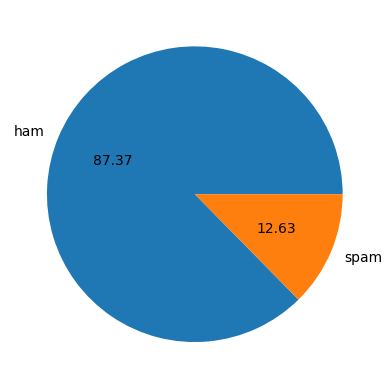

In [28]:
import matplotlib.pyplot as plt
plt.pie(sms_data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
#Data is imbalance


In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
#number of characters
sms_data['num_characters']=sms_data['text'].apply(len)

In [31]:
sms_data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
#number of words
sms_data['num_words']=sms_data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
sms_data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
sms_data['num_sentences']=sms_data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
sms_data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
sms_data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
#describing ham messages
sms_data[sms_data['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#describing spam messages
sms_data[sms_data['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [39]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

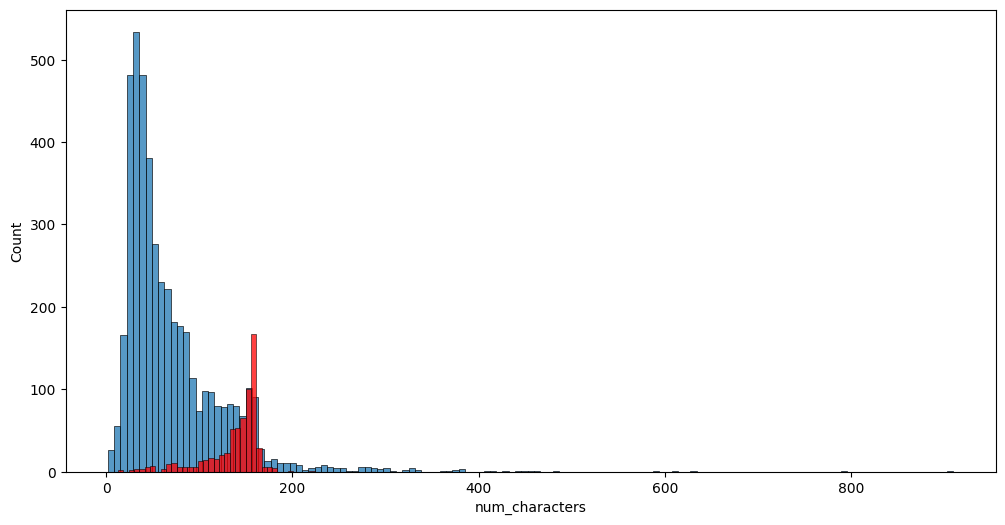

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(sms_data[sms_data['target']==0]['num_characters'])
sns.histplot(sms_data[sms_data['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

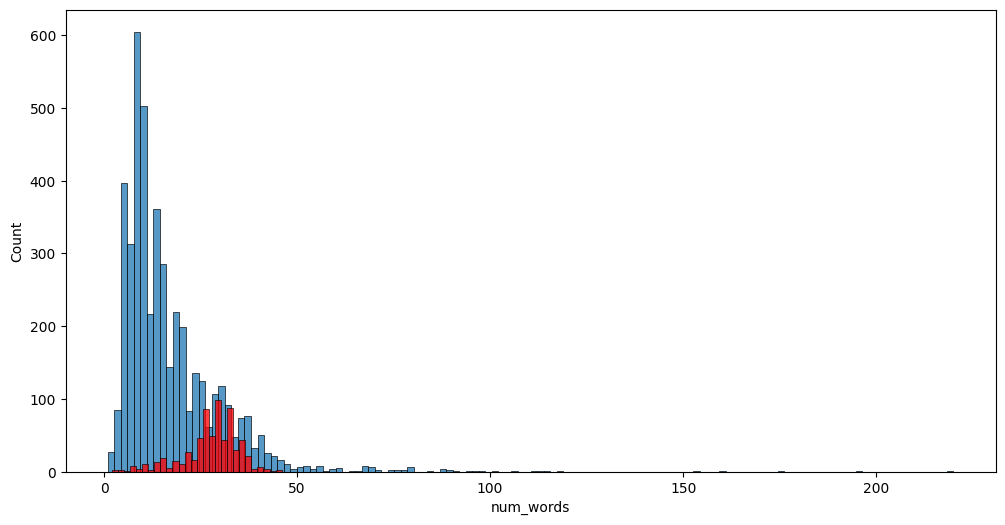

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(sms_data[sms_data['target']==0]['num_words'])
sns.histplot(sms_data[sms_data['target']==1]['num_words'],color='red')

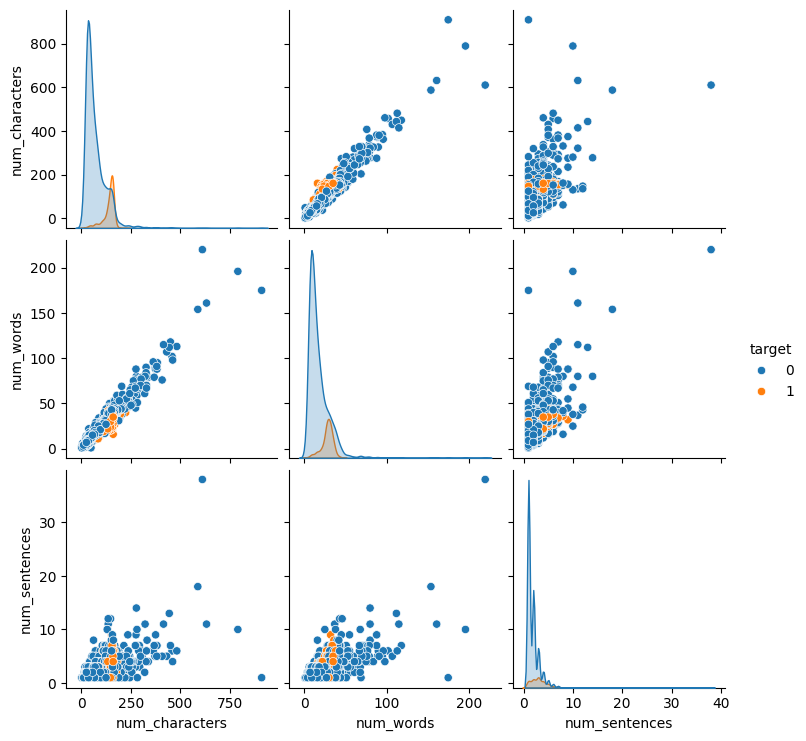

In [42]:
#lets see the relation between the columns num_words,num_characters and num_sentences
sns.pairplot(sms_data,hue='target')

<Axes: >

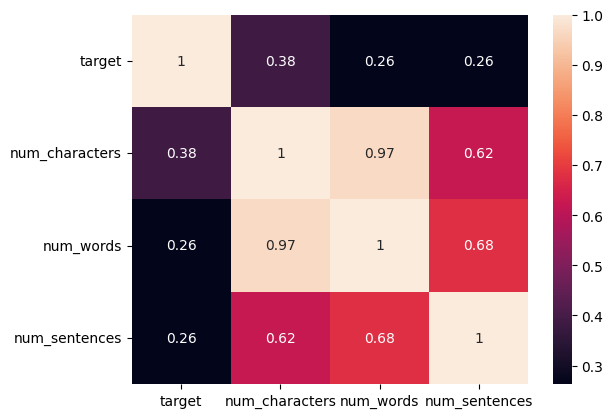

In [43]:
#correlation
sns.heatmap((sms_data[['target','num_characters','num_words','num_sentences']]).corr(),annot=True)

# 3.Data Preprocessing



*   Lower Case

*   Tokenization
*   Removing special characters


*   Removing stop words and punctuation

*   Stemming






In [44]:
# function for lower case and tokenizing the text
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [45]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
import string

In [50]:
transform_text('Hi how are you sakshi')

'hi sakshi'

In [49]:
sms_data['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [48]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [51]:
sms_data['transformed_text']=sms_data['text'].apply(transform_text)

In [52]:
sms_data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [54]:
spam_wc=wc.generate(sms_data[sms_data['target']==1]['transformed_text'].str.cat(sep=" "))

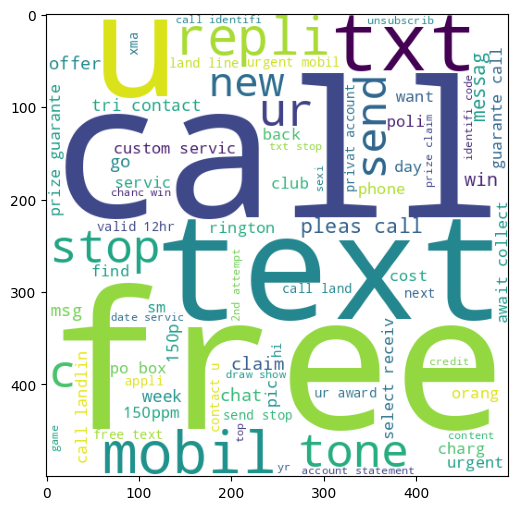

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [56]:
ham_wc=wc.generate(sms_data[sms_data['target']==0]['transformed_text'].str.cat(sep=" "))

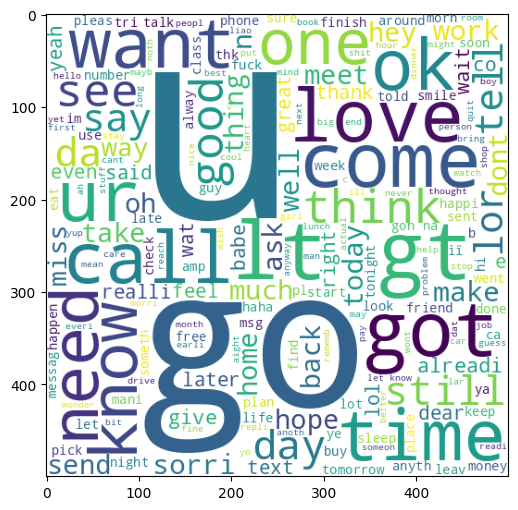

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [58]:
spam_corpus=[]
for msg in sms_data[sms_data['target']==1]['transformed_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [59]:
len(spam_corpus)

9939

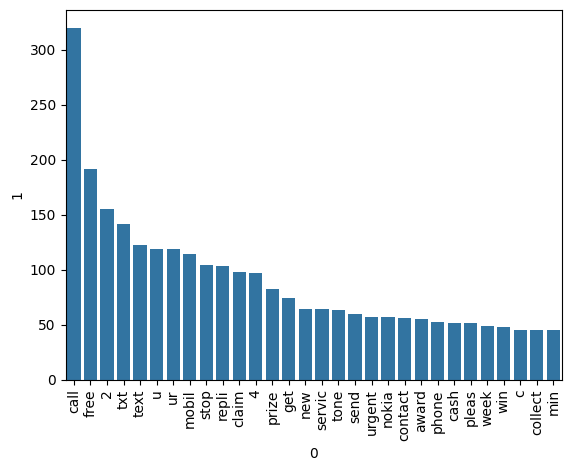

In [60]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [61]:
ham_corpus=[]
for msg in sms_data[sms_data['target']==0]['transformed_text'].tolist():
  for words in msg.split():
    ham_corpus.append(words)

In [62]:
len(ham_corpus)

35404

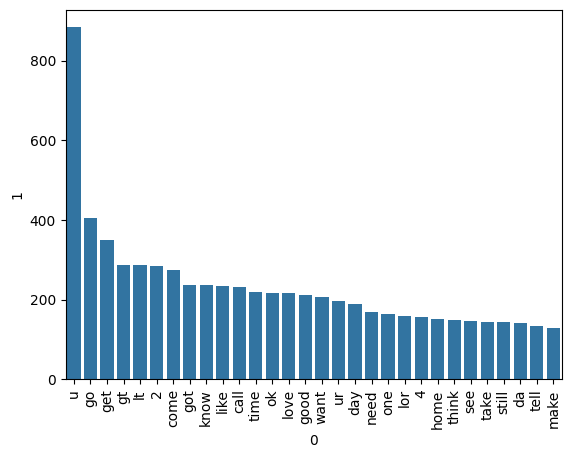

In [63]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [64]:
#using naive bayes algorithm because naive bayes works well on textual data
#text vectorization
#Using bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [65]:
X=tfidf.fit_transform(sms_data['transformed_text']).toarray()

In [66]:
X.shape

(5169, 3000)

In [67]:
y=sms_data['target'].values

In [68]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
from sklearn.model_selection import train_test_split


In [70]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [72]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [73]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [74]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [75]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
#tfidf --> MVB

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [77]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [78]:
clfs={
    'SVC':svc,
    'KNN':knc,
    'MNB':mnb,
    'DTC':dtc,
    'LR':lrc,
    'RFC':rfc,
    'Adaboost':abc,
    'BC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [79]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [80]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [81]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision= train_classifier(clf,X_train,y_train,X_test,y_test)

  print('For',name)
  print('Accuracy-',current_accuracy)
  print('Precision-',current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

KeyboardInterrupt: 